Interpretation of content from *Baysean Statistics the Fun Way* by Will Kurt
#### Ch 4: Binomial Probability Distribution

In [7]:
import math
from scipy.stats import binom
import matplotlib.pyplot as plt

**Combinatorics** - Binomial Probability  
"n choose k," out of n trials, get k successes:  

$ \left( \begin{array}{c} n \\ k \end{array} \right) = \large\frac{n!}{k!  (n-k)!} $

To do this we can use `math.comb(n, k)`, reveals the number of ways it can happen:

In [13]:
# Out of 5 trials, get 2 successes:
n = 5
k = 2
num_ways = math.comb(n, k)
print(f'There are {num_ways} ways to get 2 successes out of 10 trials')

There are 10 ways to get 2 successes out of 10 trials


Using this formula, we can combine it with the probabilities of the different outcomes, and plot the probabilities of *all outcomes* in a probability mass function:  
  
Probability of getting k successes (where p is prob success and q = 1-p (prob failure):
$$ P(k) = pmf = \large\frac{n!}{k!  (n-k)!} * p^x * q^{(n-x)} $$  
  
In Python, we can do this with `binom.pmf(k,n,p)`  
Visualize the binomial distribution for 10 coin flips

In [14]:
n = 10 # 10 trials
p = .5 # .5 chance of success
k = list(range(0,11)) # a listing of all possible outcomes, i.e. number of successes,
#  from 0 heads to 10 heads. 

In [15]:
# pmf probability mass function
probs = list(binom.pmf(k,n,p))  

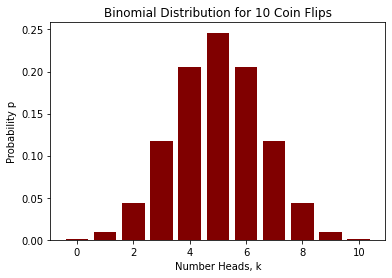

In [16]:
plt.bar(k, probs, color = 'maroon')
plt.title("Binomial Distribution for 10 Coin Flips")
plt.xlabel("Number Heads, k")
plt.ylabel("Probability p")
plt.show()

Visualize the binomial distribution for 10 rolls of a 6 sided die

In [17]:
n = 10
p = 1/6
k = list(range(0,11))

In [18]:
probs = binom.pmf(k,n,p)

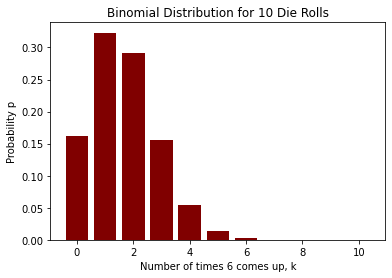

In [19]:
plt.bar(k, probs, color = 'maroon')
plt.title("Binomial Distribution for 10 Die Rolls")
plt.xlabel("Number of times 6 comes up, k")
plt.ylabel("Probability p")
plt.show()

We can get a cumulative probability to reflect the probability of a range k and up, or down with  
`binom.cdf(k,n,p)`

In [22]:
n = 10  # trials
p = 0.5  # probability of success in each trial

# Choose a specific point for which you want to calculate the cumulative probability
k = 8  # number of successes

# Calculate the cumulative probability using the cdf method
cumulative_probability = binom.cdf(k, n, p)

# up to k (left side)
print(f"Cumulative Probability for {k} or fewer successes: {cumulative_probability:.4f}")
# more than k, (right side)
print(f"Cumulative Probability for {k+1} or more successes: {1-cumulative_probability:.4f}")


Cumulative Probability for 8 or fewer successes: 0.9893
Cumulative Probability for 9 or more successes: 0.0107


### Chapter 4 Exercises
#### 1. What are the params of the binom dist for the probability of rolling either a 1 or a 20 on a 20 sided die, if we roll the die 12 times?
B(k; n, p) = B(1; 12, 1/10)

In [26]:
k, b, p = 1, 12, 1/10
print(f'{round(binom.pmf(k,n,p), 2)*100}%')

39.0%


#### 2. Standard 52 card deck. Shuffle, draw and replace. How many ways can you pull just one ace in five pulls?  

In [27]:
# obviously 5, but in case the numbers were messiers, here it is:
n = 5 # 5 pulls
k = 1 # just one ace
math.comb(n, k) 

5

#### 3. Continuing with the cards, what's the prob of pulling 5 aces in 10 pulls?
This is a binomial probability question.  
We've got 10 trials (n=10), looking for 5 successes (k=5), and the odds of a success on a single trial, considering we have replacement, is 4/52.

In [30]:
k = 5
n = 10
p = 4/52
print(f' probability is {round(binom.pmf(k,n,p)*100, 3)}%')

 probability is 0.045%


#### 4. If you have a 1/5 probability of a job offer when you interview, and you interview at 7 companies a month, what's the probability you'll have at least 2 competing offers by the end of the month?
Another binomial problem. 7 trials, probability of success 1/5, looking for 2 OR MORE successes.

In [66]:
# using pmf with a loop to get 2 and up.
sum = 0 
for i in range(2,8):
    sum += binom.pmf(i,7,1/5)
print(f'{round(100*sum,3)}%')

42.328%


In [67]:
# using cdf... I guess it works like "greater than k" as in the next number up, 
# so we use k=1? Too lazy to check this docs, but this is how you get the correct answer. 
k = 1
n = 7
p = 1/5
print(f' probability is {round((1-binom.cdf(k,n,p))*100, 3)}%')

 probability is 42.328%


#### 5. Continuing with the job example. You have 25 job interviews lined up next month. This will leave you exhausted and so the probability of success will drop to 1/10. You don't want to do 25 interviews unless doing so makes you twice as likely to get at least 2 offers. So should you do the 25, or just stick to the 7?

In [68]:
k = 1
n = 25
p = 1/10
print(f' probability is {round((1-binom.cdf(k,n,p))*100, 3)}%')

 probability is 72.879%


That's a lot higher, but it's not twice as likely, so maybe don't do all those interviews.